# 911-Call-Analysis

For this project, some data on 911 calls from [Kaggle] will be analyzed (https://www.kaggle.com/mchirico/montcoalert ). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Importing Dependencies**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Set visual style
sns.set_style("whitegrid")


Loading the dataset into a pandas DataFrame for further analysis.

In [3]:
df = pd.read_csv('911.csv')
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Data analysis

____
We begin by identifying which ZIP codes receive the highest number of 911 calls. This helps us understand the geographic distribution of emergency activity.

In [7]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

Townships represent administrative regions within Montgomery County. Here we find the areas with the highest call activity.

In [8]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

Each entry in the title column contains both a category and a specific sub-reason
(e.g., "EMS: BACK PAINS").
Before breaking this apart, let’s see how many unique titles exist.

In [ ]:
df['title'].nunique()

110

## Creating new features

____
The title column contains strings like:
- "EMS: FALL VICTIM"
- "Fire: VEHICLE ACCIDENT"
- "Traffic: DISABLED VEHICLE"

To analyze major categories of emergencies, we extract the part before the colon, calling it "Reason".

In [10]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Now that we extracted the "Reason", let's identify which emergency type occurs most frequently.

In [11]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

## Plotting

____
A countplot gives us a quick overview of the most common emergency types.

Text(0.5, 1.0, 'Distribution of Emergency Call Reasons')

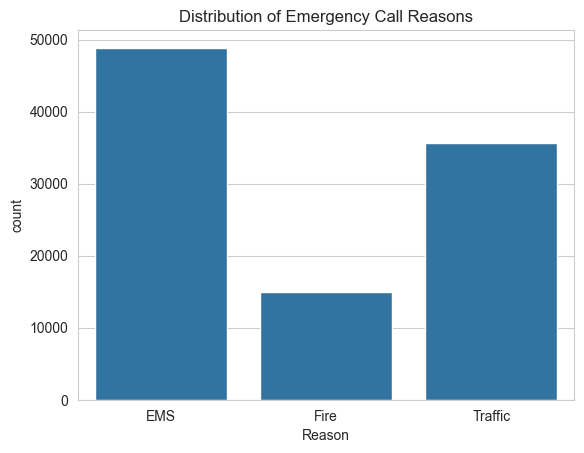

In [15]:
sns.countplot(data=df, x='Reason')
plt.title('Distribution of Emergency Call Reasons')

### Working with Timestamps

The timeStamp column is currently stored as text.
We convert it into a proper datetime object to extract useful temporal features.

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [22]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

Extracting Hour, Day of Week, and Month

- Hour — hour of the call
- Day of Week — day name (Monday, Tuesday, etc.)
- Month — numeric month

In [35]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


The Day of Week column uses numbers (0 = Monday, 6 = Sunday).
We map these values to readable day names.

In [ ]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df[['Day of Week', 'Month']].head()

,Day of Week,Month
0,Thu,12
1,Thu,12
2,Thu,12
3,Thu,12
4,Thu,12


## Visualizing Emergency Calls

___
### Countplot of calls by Day of Week, colored by Reason

This plot shows which days of the week experience the most emergency calls.
Coloring by "Reason" reveals patterns in specific emergency types.

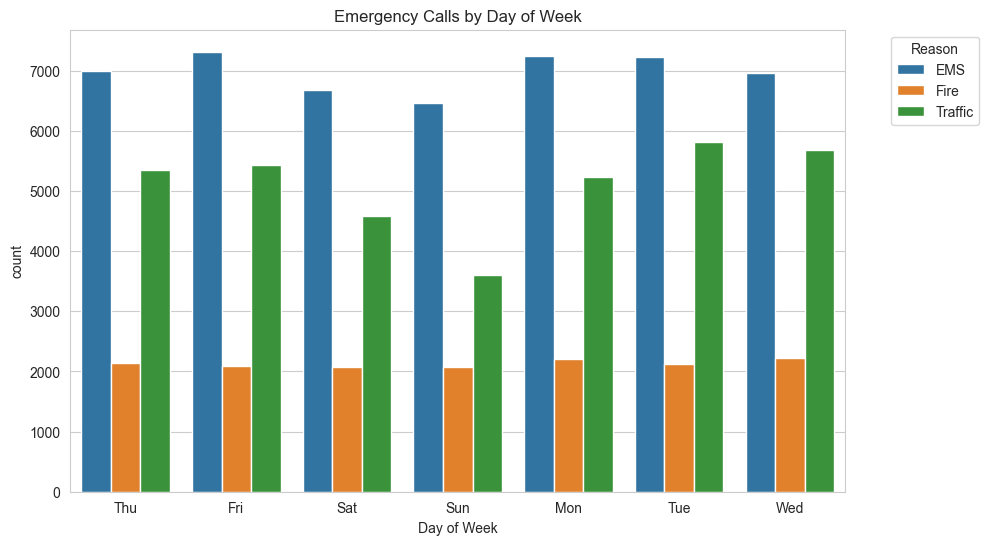

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day of Week', hue='Reason')
plt.title('Emergency Calls by Day of Week')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')

### Countplot of calls by Month, colored by Reason

This figure highlights seasonal trends in 911 call activity.
However, you may notice that some months are missing due to lack of data in early records.

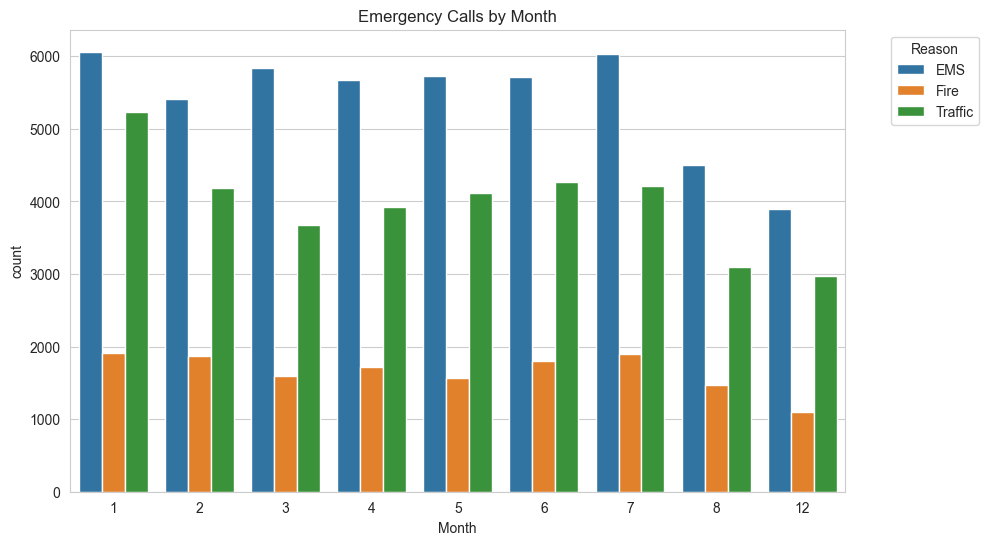

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Reason')
plt.title('Emergency Calls by Month')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')

## Fixing the *“missing months”* issue

___
To confirm missing months, we group by "Month" and count the number of calls in each month.

In [40]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Plotting calls per Month

Plotting the grouped data provides a clearer view of monthly trends.

Text(0, 0.5, 'Count')

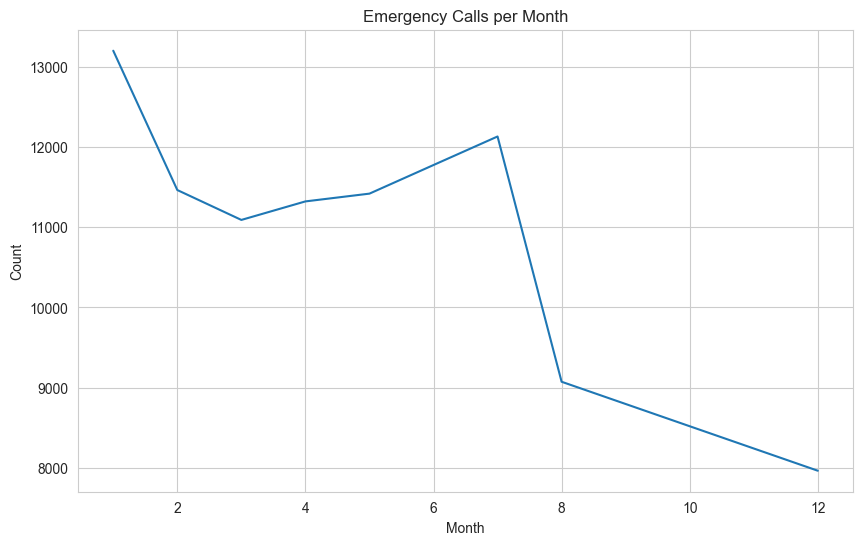

In [ ]:
plt.figure(figsize=(10, 6))
byMonth['twp'].plot()
plt.title('Emergency Calls per Month')
plt.ylabel('Count')

### Adding a linear trend line
An lmplot allows us to visualize the general trend over time using linear regression.

Text(0.5, 1.0, 'Monthly Emergency Calls Trend')

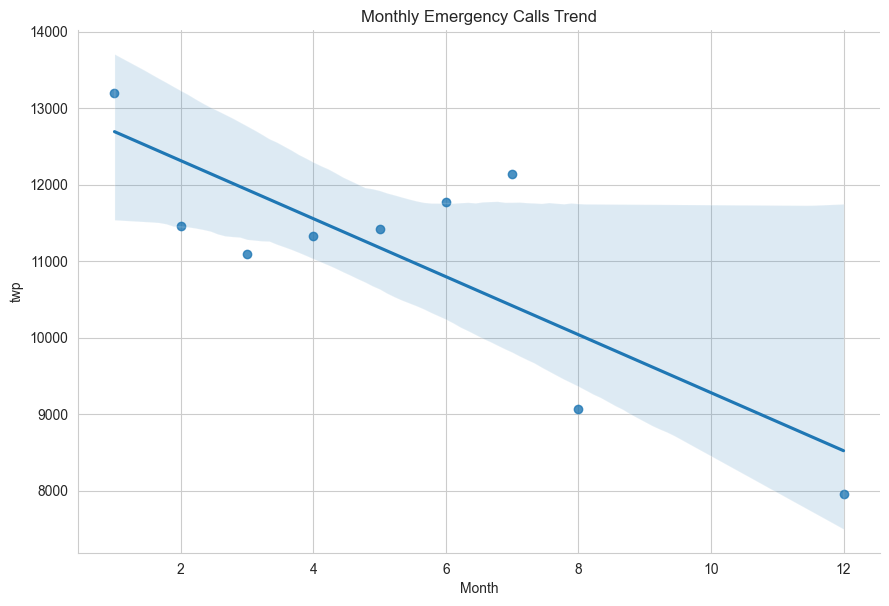

In [39]:
sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp', height=6, aspect=1.5)
plt.title('Monthly Emergency Calls Trend')

### Creating a Date Column
We create a new column called "Date", which includes only the date (year–month–day).
This makes it easier to analyze daily call patterns.

In [42]:
df['Date'] = df['timeStamp'].dt.date
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


We group the data by the new "Date" column and count how many calls occurred each day.

In [43]:
daily_calls = df.groupby('Date').count()
daily_calls['twp'].head()

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
Name: twp, dtype: int64

## Plotting 

____
This line plot shows how emergency call volume changes day by day.

Text(0, 0.5, 'Number of Calls')

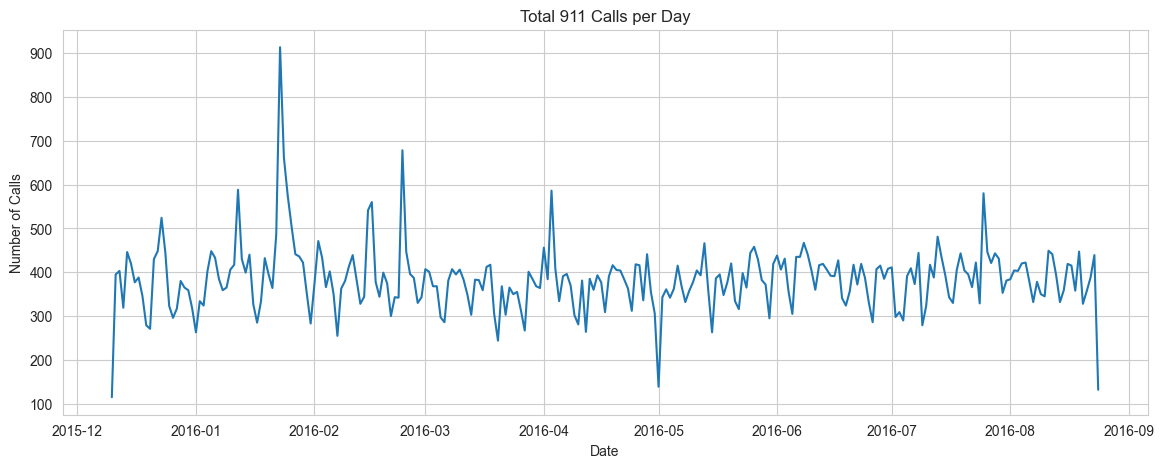

In [44]:
plt.figure(figsize=(14, 5))
daily_calls['twp'].plot()
plt.title('Total 911 Calls per Day')
plt.ylabel('Number of Calls')

To better understand patterns, we filter data by "Reason" and plot daily call volume for each category individually.

### EMS Calls per Day

Text(0, 0.5, 'Count')

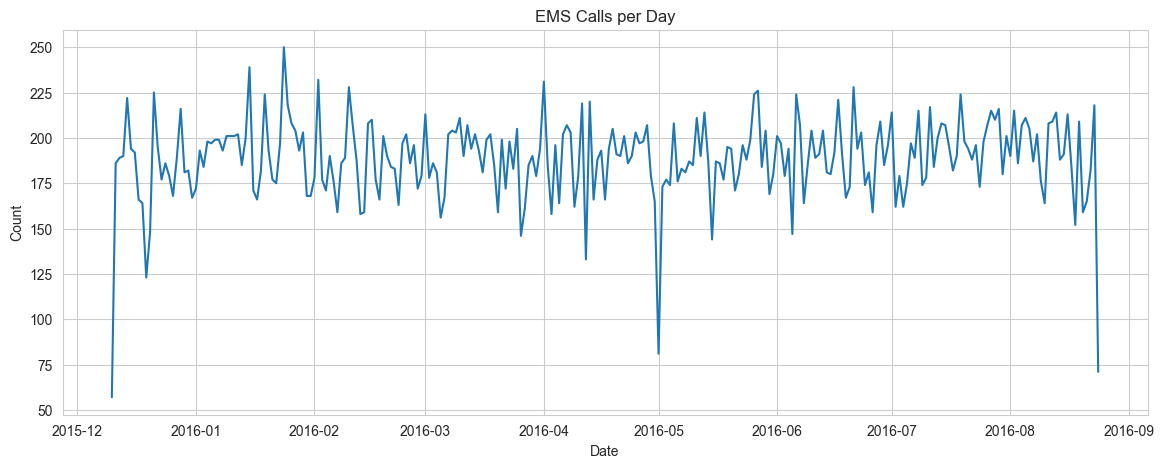

In [45]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot(figsize=(14, 5))
plt.title('EMS Calls per Day')
plt.ylabel('Count')

### Fire Calls per Day

Text(0, 0.5, 'Count')

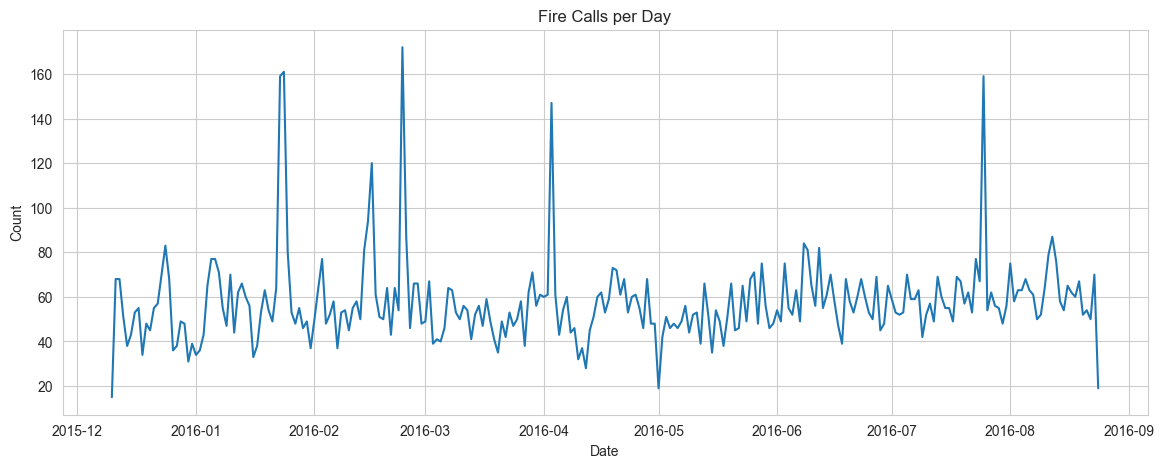

In [46]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot(figsize=(14, 5))
plt.title('Fire Calls per Day')
plt.ylabel('Count')

### Traffic Calls per Day

Text(0, 0.5, 'Count')

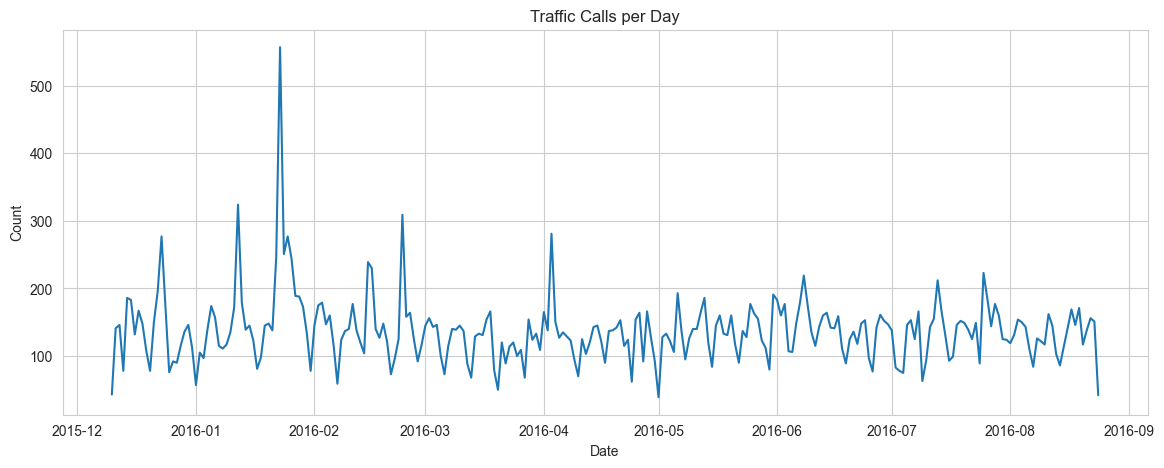

In [47]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot(figsize=(14, 5))
plt.title('Traffic Calls per Day')
plt.ylabel('Count')

## Heatmap: Day of Week vs Hour

___
We analyze how emergency calls vary depending on the time of day and the day of the week.
First, we create a pivot table with:
- rows → Day of Week
- columns → Hour
- values → Number of calls

In [48]:
day_hour = df.groupby(['Day of Week', 'Hour']).count()['twp'].unstack()
day_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


Heatmap visualization

Text(0.5, 1.0, '911 Calls — Heatmap (Day of Week vs Hour)')

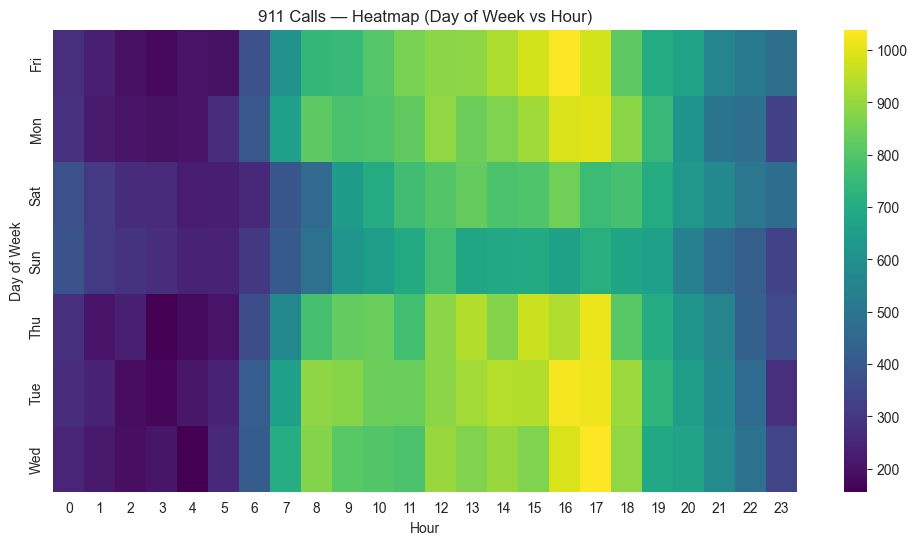

In [49]:
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour, cmap='viridis')
plt.title('911 Calls — Heatmap (Day of Week vs Hour)')

Clustermap visualization

Text(0.5, 1.0, '911 Calls — Clustermap (Day of Week vs Hour)')

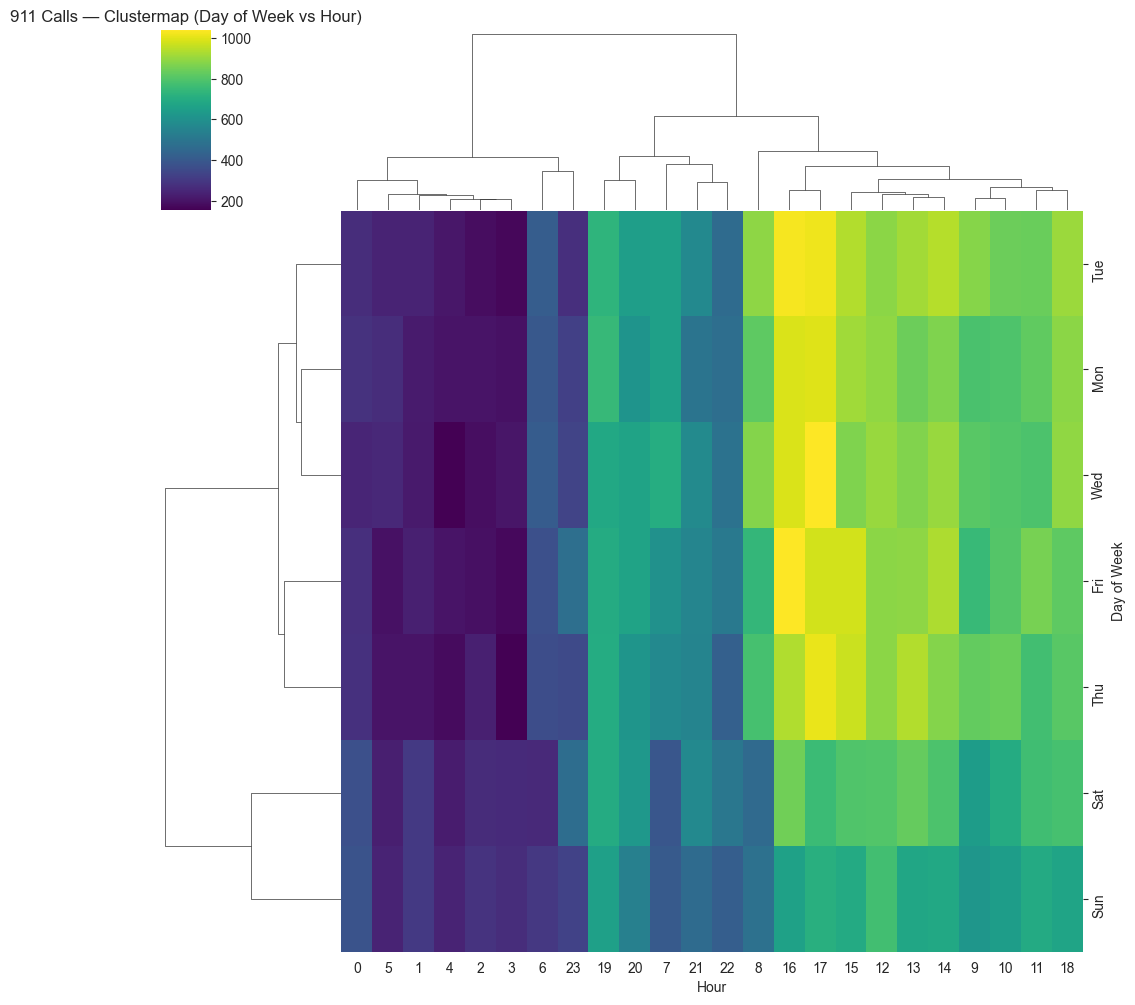

In [50]:
sns.clustermap(day_hour, cmap='viridis')
plt.title('911 Calls — Clustermap (Day of Week vs Hour)')

## Heatmap: Day of Week vs Month

___
Now we analyze seasonal and weekly patterns combined.

In [ ]:
month_day = df.groupby(['Day of Week', 'Month']).count()['twp'].unstack()
month_day.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265


Heatmap visualization

Text(0.5, 1.0, '911 Calls — Heatmap (Day of Week vs Month)')

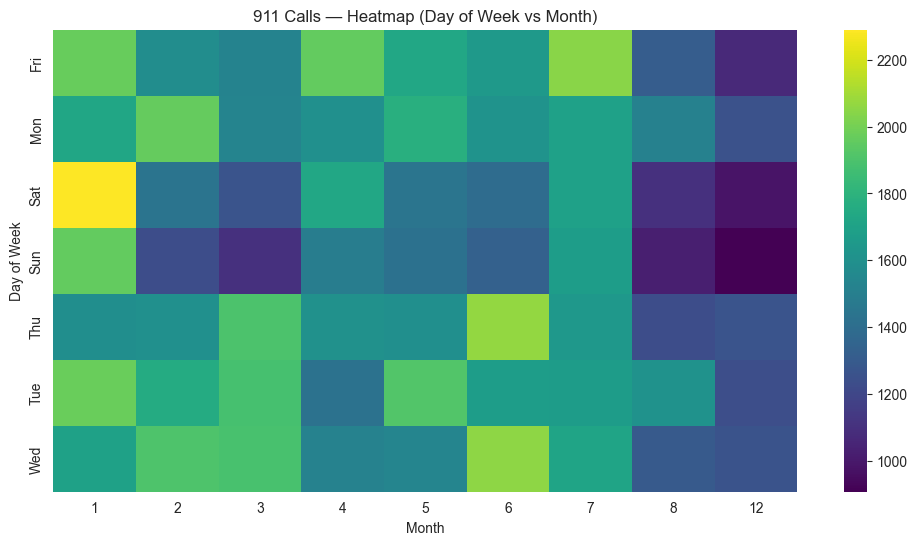

In [52]:
plt.figure(figsize=(12, 6))
sns.heatmap(month_day, cmap='viridis')
plt.title('911 Calls — Heatmap (Day of Week vs Month)')

Clustermap visualization

Text(0.5, 1.0, '911 Calls — Clustermap (Day of Week vs Month)')

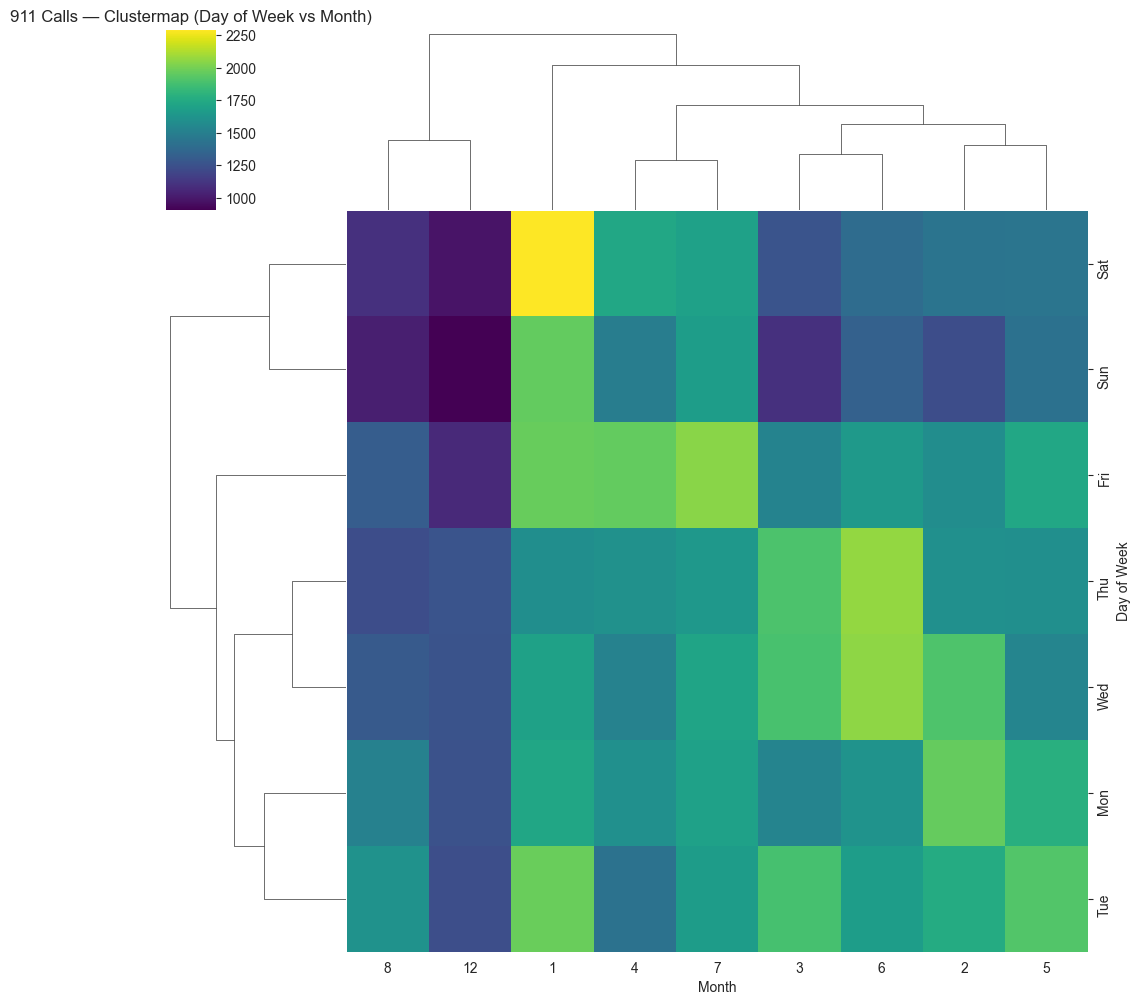

In [53]:
sns.clustermap(month_day, cmap='viridis')
plt.title('911 Calls — Clustermap (Day of Week vs Month)')

Now we analyze top 10 most common emergency titles.

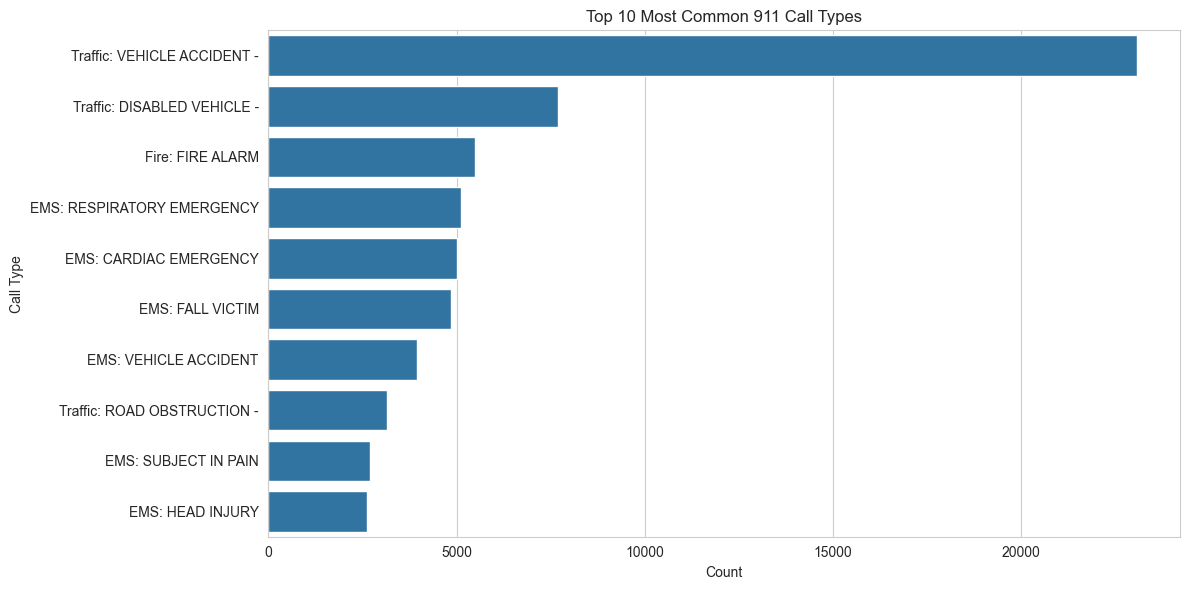

In [56]:
top_10 = df['title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index)
plt.title("Top 10 Most Common 911 Call Types")
plt.xlabel("Count")
plt.ylabel("Call Type")
plt.tight_layout()

Selecting numeric features for correlation

In [61]:
numeric_df = df[['lat', 'lng', 'zip', 'Hour', 'Month', 'Day of Week']].copy()
numeric_df = numeric_df.dropna()

Correlation matrix

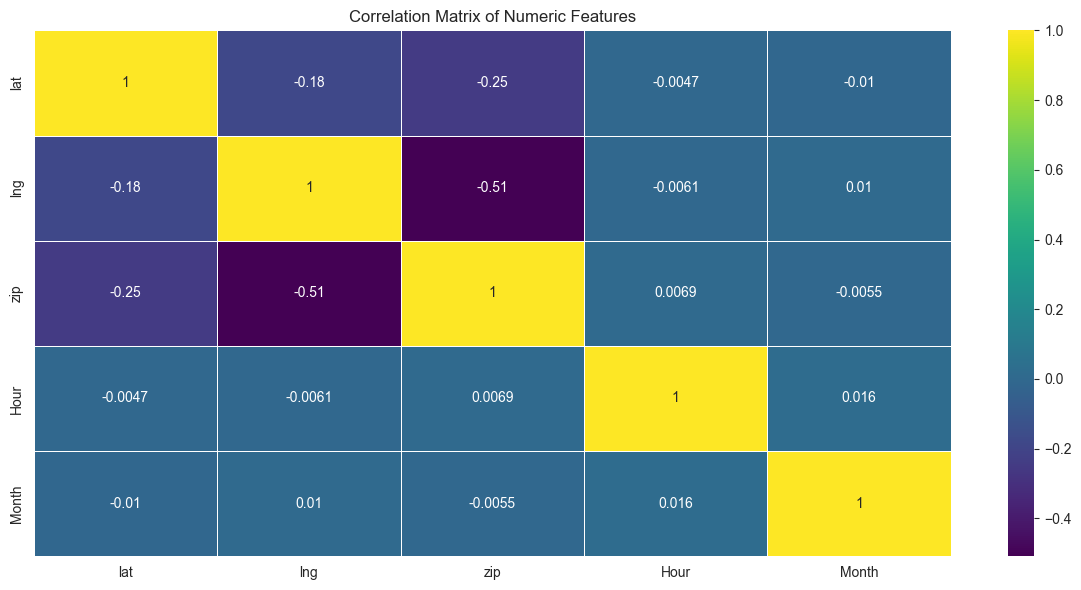

In [64]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(numeric_only=True), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()